In [47]:
# import all the required libraries

from prophet import Prophet
from prophet.plot import plot_plotly

from datetime import datetime 
#import plot_plotly
import plotly.offline as py
py.init_notebook_mode()

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [72]:
# read the csv file
df = pd.read_csv('all_stocks.csv')
df.head(20)

Date        Open        High         Low       Close  \
0   2021-01-04 00:00:00-05:00  120.315491  120.382408  117.629066  118.489487   
1   2021-01-05 00:00:00-05:00  119.512428  121.108986  119.130020  120.592735   
2   2021-01-06 00:00:00-05:00  121.319313  126.080307  121.147224  123.604210   
3   2021-01-07 00:00:00-05:00  124.321220  124.722755  122.619499  123.317398   
4   2021-01-08 00:00:00-05:00  122.915871  123.632889  121.395790  122.877632   
5   2021-01-11 00:00:00-05:00  122.323135  123.977058  122.045891  122.925430   
6   2021-01-12 00:00:00-05:00  123.413002  124.139580  122.313576  123.527725   
7   2021-01-13 00:00:00-05:00  123.470360  124.043976  120.898659  121.338432   
8   2021-01-14 00:00:00-05:00  122.390060  124.435944  121.940727  123.298279   
9   2021-01-15 00:00:00-05:00  122.638626  123.556404  122.055450  122.743790   
10  2021-01-19 00:00:00-05:00  123.594643  123.891014  122.456978  123.346077   
11  2021-01-20 00:00:00-05:00  123.996178  125.296364  122.906311  124.359467   
12  2021-01-21 00:00:00-05:00  124.397705  126.424477  124.330788  125.860420   
13  2021-01-22 00:00:00-05:00  115.391968  115.391968  112.198853  113.393883   
14  2021-01-25 00:00:00-05:00  113.537285  114.282982  112.284897  113.365204   
15  2021-01-26 00:00:00-05:00  113.938812  117.198853  113.212234  117.103249   
16  2021-01-27 00:00:00-05:00  116.711281  119.302101  116.271507  117.084129   
17  2021-01-28 00:00:00-05:00  117.399620  117.782028  114.789673  114.799232   
18  2021-01-29 00:00:00-05:00  114.933075  115.965584  113.671127  113.871895   
19  2021-02-01 00:00:00-05:00  114.627151  115.630974  113.508606  115.239006   

     Adj Close    Volume  
0   106.178665   5417443  
1   108.063400   6395872  
2   110.761986   8322708  
3   110.504982   4714740  
4   110.110893   4891305  
5   110.153732   5859587  
6   110.693436   3921663  
7   108.731613   8030874  
8   110.487831   7848347  
9   109.990974   5131153  
10  110.530670   5646308  
11  111.438774   5856240  
12  112.783783  13116003  
13  101.612495  39814421  
14  101.586800  14315974  
15  104.936462  11186656  
16  104.919334  12705239  
17  102.871819   8455969  
18  102.040848  12369473  
19  103.265907   6538023

In [32]:
# Creating a copy of the initial datagrame to make various transformations 
# we are only copying the Date and closing price

df2= df[['Date','Close']].copy()

#df2.columns = ["Close"]

In [33]:
df2.head()

Date       Close
0  2021-01-04 00:00:00-05:00  118.489487
1  2021-01-05 00:00:00-05:00  120.592735
2  2021-01-06 00:00:00-05:00  123.604210
3  2021-01-07 00:00:00-05:00  123.317398
4  2021-01-08 00:00:00-05:00  122.877632

In [34]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    251 non-null    object 
 1   Close   251 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.0+ KB


In [38]:
# the date column is in object type so we need to change it into datetime format

df2['Date'] = pd.to_datetime(df2.Date,errors='ignore')
df2['Date'] = df2['Date'].apply(lambda x : x.strftime('%Y-%m-%d'))
df2['Date'] = pd.to_datetime(df2.Date,errors='ignore')

In [39]:
df2.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

In [51]:
# changing Date to ds and target variable open price to y

df2 = df2.rename(columns={'Date': 'ds',
                        'Close': 'y'})

df2.head()

ds           y
0 2021-01-04  118.489487
1 2021-01-05  120.592735
2 2021-01-06  123.604210
3 2021-01-07  123.317398
4 2021-01-08  122.877632

In [52]:
df2.head()

ds           y
0 2021-01-04  118.489487
1 2021-01-05  120.592735
2 2021-01-06  123.604210
3 2021-01-07  123.317398
4 2021-01-08  122.877632

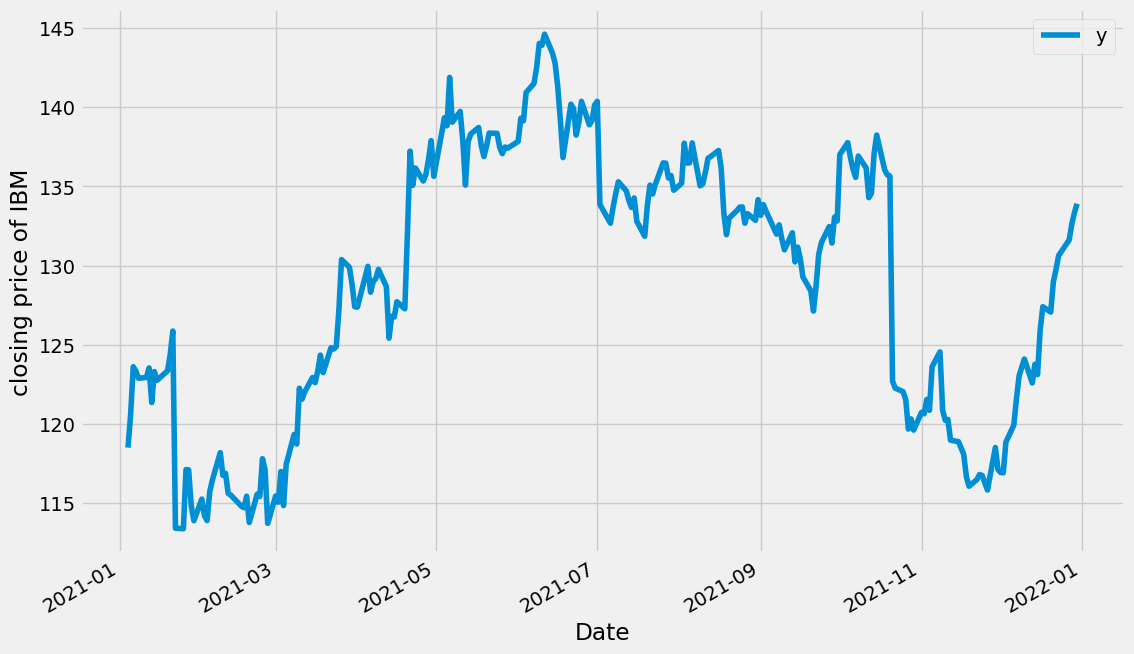

In [54]:
# plotting the line graph of the data

ax = df2.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('closing price of IBM')
ax.set_xlabel('Date')

plt.show()

In [115]:
# set the uncertainty interval to 95% (the Prophet default is 80%)
my_model = Prophet(interval_width=0.95, changepoint_range= 1)

In [116]:
my_model.fit(df2)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\praja\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [117]:
# creating future dates for forcasting

future_dates = my_model.make_future_dataframe(periods=36, freq='D')
future_dates.head()

ds
0 2021-01-04
1 2021-01-05
2 2021-01-06
3 2021-01-07
4 2021-01-08

In [118]:
future_dates.shape

(287, 1)

In [119]:
'''
here yhat is the predicted variable whereas yhat_lower is lower bound of the forcast
yhat_upper is upper bound of the forcast
'''

forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

C:\Users\praja\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\praja\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



ds        yhat  yhat_lower  yhat_upper
0   2021-01-04  120.882208  115.160149  126.767222
1   2021-01-05  120.565157  114.751193  126.244650
2   2021-01-06  120.707227  114.779320  126.513143
3   2021-01-07  120.609853  114.750876  126.382586
4   2021-01-08  120.076370  114.499547  125.552016
..         ...         ...         ...         ...
282 2022-01-31  141.195704  133.545777  148.590795
283 2022-02-01  141.332727  133.177538  149.197691
284 2022-02-02  141.928872  133.680965  149.676092
285 2022-02-03  142.285572  134.158419  149.926742
286 2022-02-04  142.206163  133.340133  149.851851

[287 rows x 4 columns]

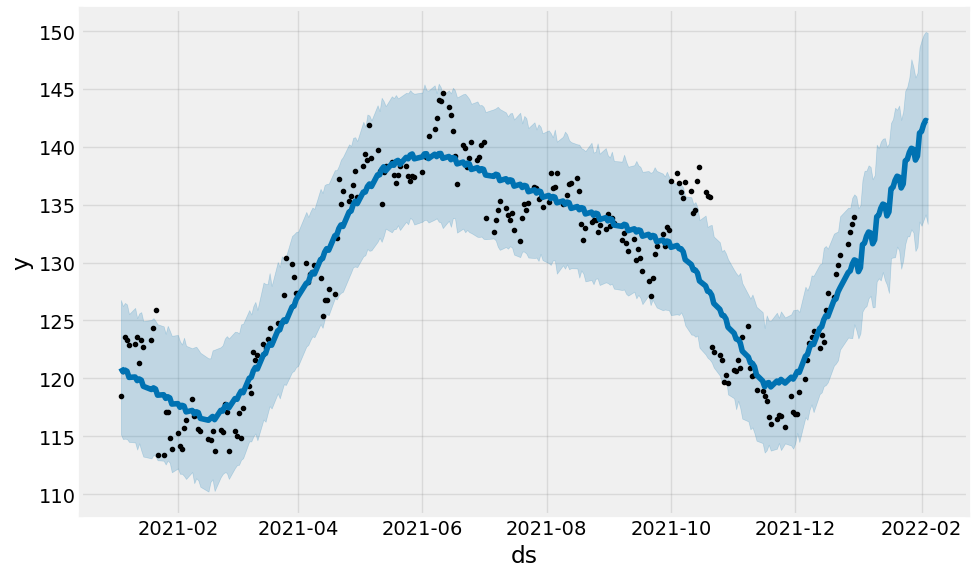

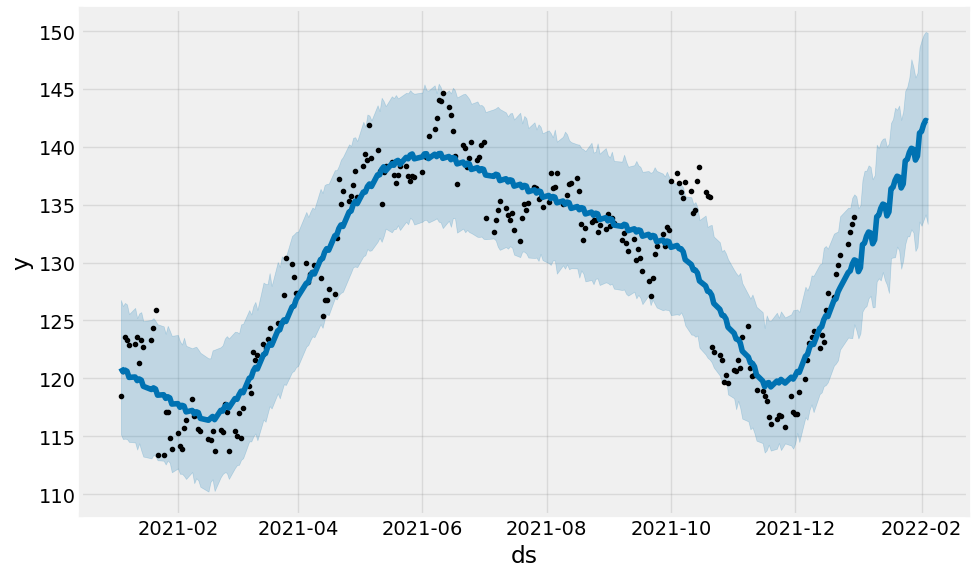

In [120]:
# plotting the forcast along with the uncertainity level

my_model.plot(forecast, uncertainty=True)

C:\Users\praja\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



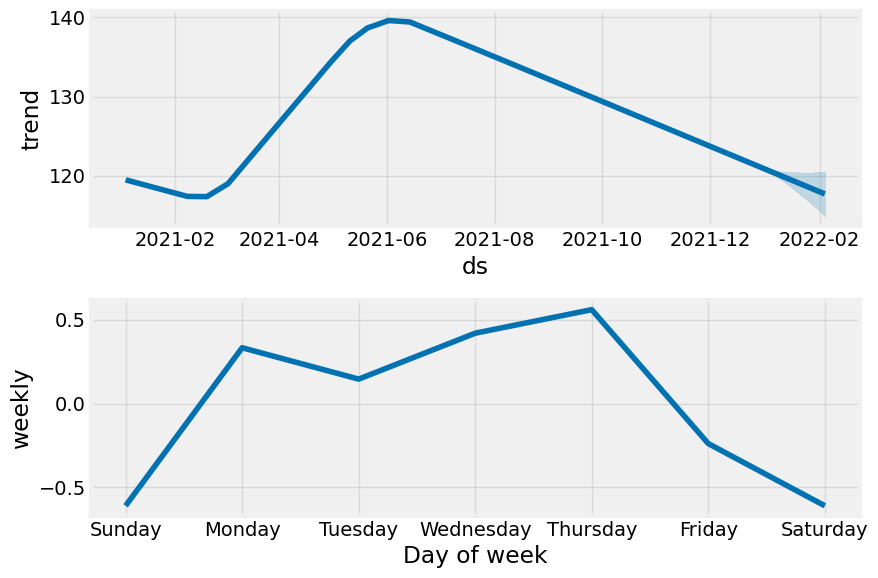

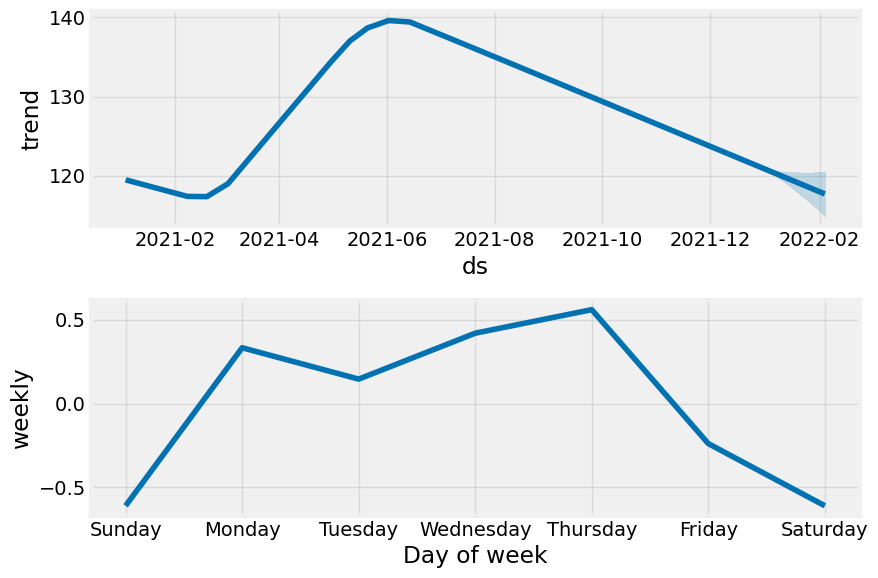

In [66]:
# plotting the trend and seasonality of the data

my_model.plot_components(forecast)

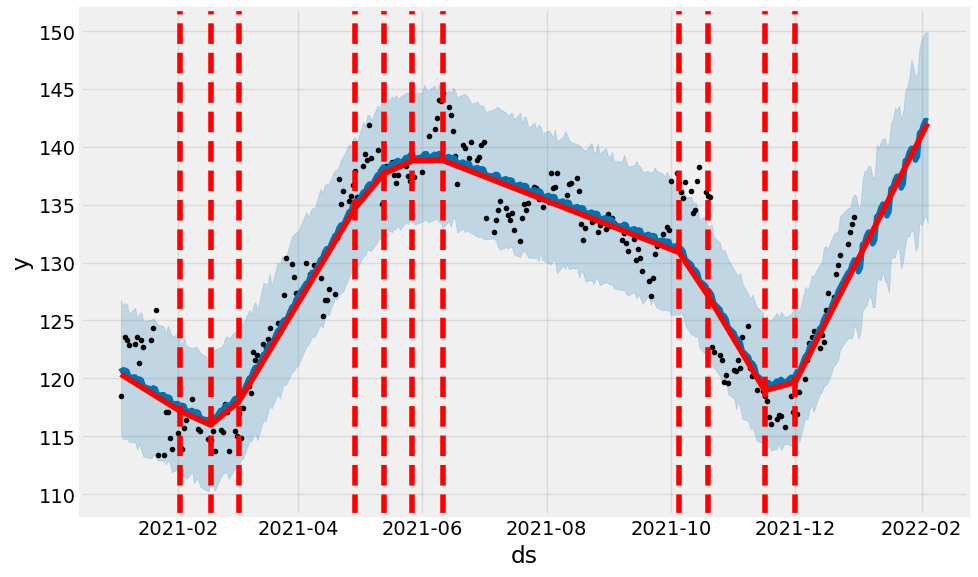

In [121]:
# plotting points where abrupt changes have occur

from prophet.plot import add_changepoints_to_plot
fig = my_model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), my_model, forecast)

In [69]:
# places where changepoints occur

my_model.changepoints

8     2021-01-14
16    2021-01-27
24    2021-02-08
32    2021-02-19
40    2021-03-03
48    2021-03-15
56    2021-03-25
64    2021-04-07
72    2021-04-19
80    2021-04-29
88    2021-05-11
96    2021-05-21
103   2021-06-02
111   2021-06-14
119   2021-06-24
127   2021-07-07
135   2021-07-19
143   2021-07-29
151   2021-08-10
159   2021-08-20
167   2021-09-01
175   2021-09-14
183   2021-09-24
191   2021-10-06
199   2021-10-18
Name: ds, dtype: datetime64[ns]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\praja\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\praja\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\praja\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



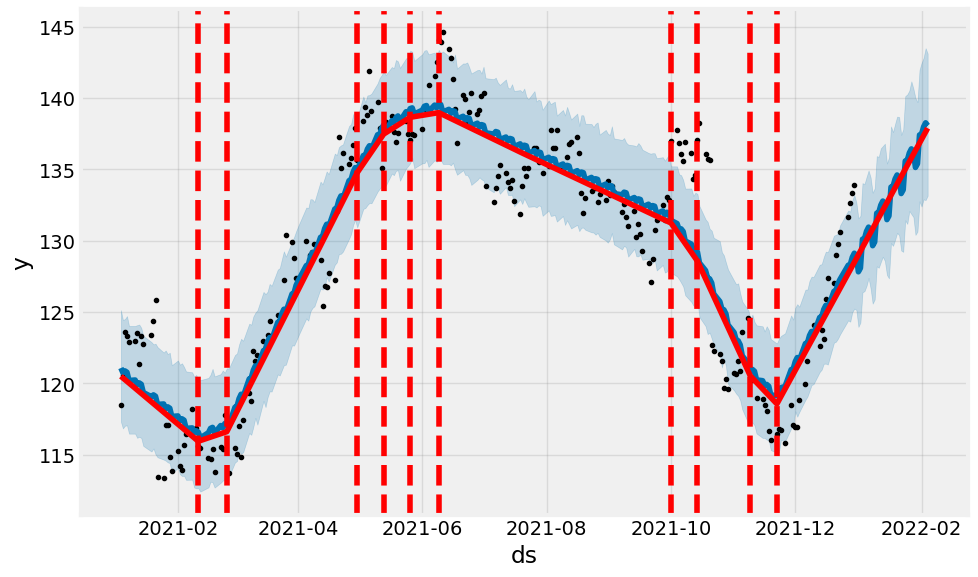

In [123]:
pro_change= Prophet(changepoint_range=0.9)
forecast = pro_change.fit(df2).predict(future_dates)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\praja\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\praja\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\praja\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



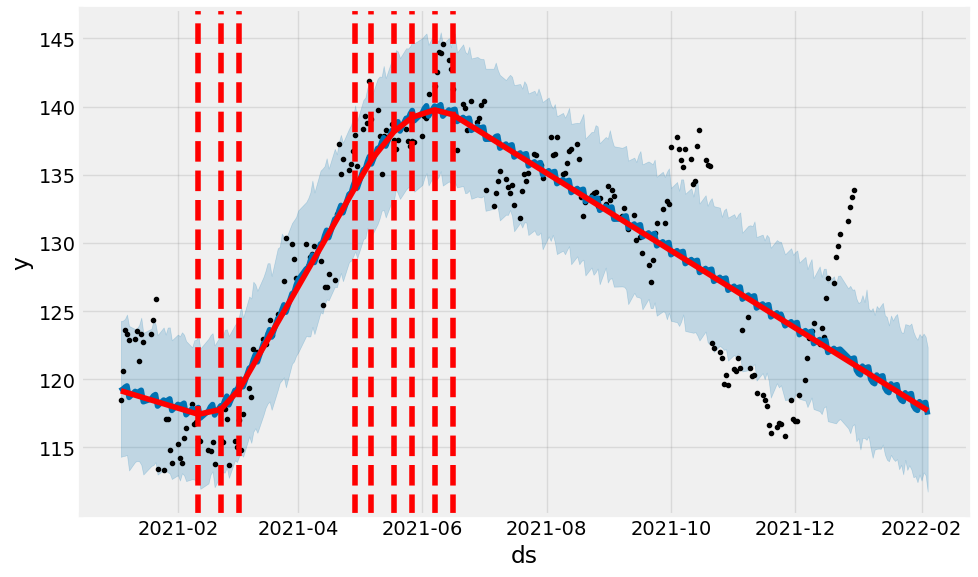

In [122]:
pro_change= Prophet(n_changepoints=30, weekly_seasonality=True)
forecast = pro_change.fit(df2).predict(future_dates)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)